<a href="https://colab.research.google.com/github/samipn/clustering_demos/blob/main/anomaly_pyod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (e): Anomaly Detection with PyOD

This notebook demonstrates anomaly detection on a synthetic 2D dataset using PyOD's IsolationForest, with ROC-AUC as a quality measure.


In [1]:
!pip install --quiet pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 8.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import roc_auc_score
from pyod.models.iforest import IForest

plt.rcParams["figure.figsize"] = (7, 6)
np.random.seed(42)


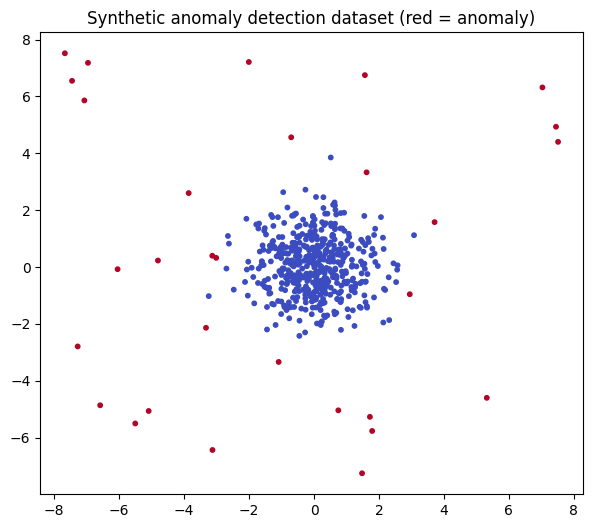

In [3]:
# Generate synthetic data with anomalies
X_normal, _ = make_blobs(
    n_samples=500,
    centers=[(0, 0)],
    cluster_std=1.0,
    random_state=42
)

# Add anomalies far away
n_anomalies = 30
X_anom = np.random.uniform(low=-8, high=8, size=(n_anomalies, 2))
X = np.vstack([X_normal, X_anom])

y_true = np.zeros(len(X), dtype=int)
y_true[-n_anomalies:] = 1  # 1 = anomaly

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', s=10)
plt.title("Synthetic anomaly detection dataset (red = anomaly)")
plt.show()


In [4]:
# Fit PyOD IsolationForest
clf = IForest(
    contamination=n_anomalies / len(X),
    random_state=42
)
clf.fit(X)

y_pred = clf.labels_              # 0 = normal, 1 = anomaly
y_scores = clf.decision_scores_   # anomaly scores

roc = roc_auc_score(y_true, y_scores)
print("ROC-AUC:", roc)

print("True anomalies:", y_true.sum())
print("Detected anomalies:", y_pred.sum())


ROC-AUC: 0.998
True anomalies: 30
Detected anomalies: 30


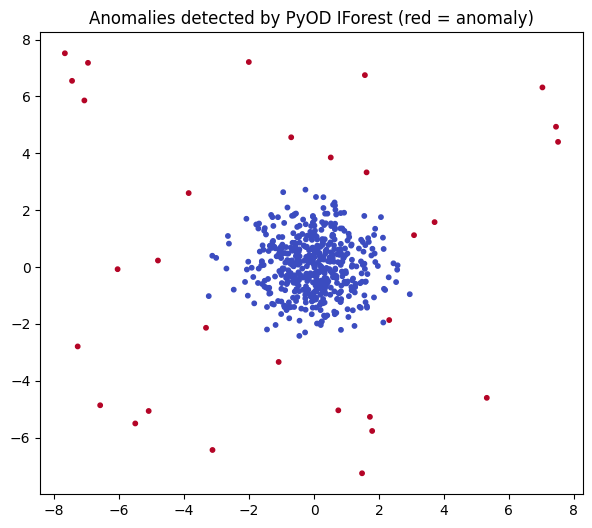

In [5]:
# Visualize anomalies detected
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=10)
plt.title("Anomalies detected by PyOD IForest (red = anomaly)")
plt.show()
